In [2]:
import mesa
from mesa import Model, Agent
from mesa.time import BaseScheduler
from mesa.space import ContinuousSpace
import networkx as nx
import random
import numpy as np
import pandas as pd
import geopandas as gpd
import os
import seaborn
import matplotlib.pyplot as plt
%matplotlib inline

path = os.getcwd()
path

'C:\\Users\\Gamelab\\Desktop\\RT\\Others\\Thesis\\Thesis_coding\\survey\\analysis\\phase-03'

In [14]:
# File imports 

nonadopters = pd.read_csv('gps_final_scored_phase3.csv')
nonadopters['PEOPLE_TOT_3PLUS']=nonadopters['PEOPLE_TOT_3PLUS'].fillna(0)
nonadopters.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CASE_ID           1340 non-null   int64  
 1   STATE             1340 non-null   int64  
 2   AGE_BINNED        1340 non-null   float64
 3   INCOME_BINNED     1340 non-null   int64  
 4   STANCE            1340 non-null   int64  
 5   PEOPLE_TOT_3PLUS  1340 non-null   float64
 6   DV7               1340 non-null   float64
 7   E2                1340 non-null   float64
 8   BB1               1340 non-null   float64
 9   BB2               1340 non-null   float64
 10  BB3               1340 non-null   float64
 11  BTE8              1340 non-null   float64
 12  BE10              1340 non-null   float64
 13  Co3               1340 non-null   float64
 14  BE13              1340 non-null   float64
 15  PBC3              1340 non-null   float64
 16  PBC5              1340 non-null   float64


In [15]:
demographics = nonadopters[['CASE_ID','AGE_BINNED','INCOME_BINNED','PEOPLE_TOT_3PLUS']].set_index('CASE_ID')
tpb_attributes = nonadopters[['CASE_ID','attitude','subnorms','pbc']].set_index('CASE_ID')

In [16]:
demographics['PEOPLE_TOT_3PLUS'].unique()

array([0., 1.])

In [20]:
## need to map the numbers to categories in the survey datatable
income_map= {1:'less75k',2:'less75k',3:'75to100k',4:'100to150k',5:'150kplus'}
age_map = {1.:'25to44',2.:'45to54',3.:'55to64',4.:'65plus'}

#need to do this mapping in the households data
size_map={'1person':0.,'2person':0.,'3person':np.random.choice([0.,1.]),'4person':1.,'5person':1.,'6person':1.,'7plus':1.}

In [21]:
## mapping in the demographics data:
demographics['INCOME_BINNED']=demographics['INCOME_BINNED'].map(income_map)
demographics['AGE_BINNED']=demographics['AGE_BINNED'].map(age_map)
demographics.head()

,AGE_BINNED,INCOME_BINNED,PEOPLE_TOT_3PLUS
CASE_ID,,,
1,65plus,75to100k,0.0
2,55to64,100to150k,0.0
3,65plus,75to100k,0.0
4,65plus,100to150k,0.0
5,65plus,75to100k,0.0


In [22]:
## mapping the households data

# import subset of households file
households = gpd.read_file('subset_households_5percent.shp')
#households.head()

households['household_'] = households['household_'].map(size_map)
households.head()

,rand_point,case_id,bgid,household_,age,income,sample_inc,ami_catego,tract,elec_consu,TRACTCE10,BLOCKCE10,GEOID10,geometry
0,49600.0,49601,0136013,0.0,65plus,less75k,48211.894813,1,013601,110.040484,013601,3003,360010136013003,POINT (-73.76145 42.73081)
1,43072.0,43073,0146082,0.0,65plus,75to100k,80967.636950,4,014608,124.086360,014608,2000,360010146082000,POINT (-73.86377 42.68991)
2,63831.0,63832,0136022,0.0,25to44,less75k,68800.491254,2,013602,101.029416,013602,2016,360010136022016,POINT (-73.74489 42.68852)
3,78662.0,78663,0146144,0.0,65plus,150kplus,179780.837865,4,014614,124.086360,014614,4010,360010146144010,POINT (-73.89201 42.68515)
4,59457.0,59458,0135081,0.0,25to44,75to100k,87562.173039,4,013508,124.086360,013508,1000,360010135081000,POINT (-73.73878 42.81132)


In [23]:
## check for null values in demographics
demographics.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1340 entries, 1 to 1341
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   AGE_BINNED        1340 non-null   object 
 1   INCOME_BINNED     1340 non-null   object 
 2   PEOPLE_TOT_3PLUS  1340 non-null   float64
dtypes: float64(1), object(2)
memory usage: 41.9+ KB


In [25]:
## check for null values in demographics

#drop the points with nan value in tract
households = households.dropna()
households.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 3950 entries, 0 to 3990
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   rand_point  3950 non-null   float64 
 1   case_id     3950 non-null   int64   
 2   bgid        3950 non-null   object  
 3   household_  3950 non-null   float64 
 4   age         3950 non-null   object  
 5   income      3950 non-null   object  
 6   sample_inc  3950 non-null   float64 
 7   ami_catego  3950 non-null   int64   
 8   tract       3950 non-null   object  
 9   elec_consu  3950 non-null   float64 
 10  TRACTCE10   3950 non-null   object  
 11  BLOCKCE10   3950 non-null   object  
 12  GEOID10     3950 non-null   object  
 13  geometry    3950 non-null   geometry
dtypes: float64(4), geometry(1), int64(2), object(7)
memory usage: 462.9+ KB


In [27]:
## Other functions:
def ra_implementation(a,b):
    uncertainty_map = {0:0.5,1:0.05,2:0.1,3:0.45,4:0.1,5:0.05,6:0.3}
    mu = 0.2 #intentity of interactions

    h_ij=0
    x_j=a.attitude
    u_j= uncertainty_map[a.stance]
    x_i=b.attitude
    u_i=uncertainty_map[b.stance]

    h_ij=min(x_i+u_i, x_j+u_j) - max(x_i-u_i, x_j-u_j)

    if(h_ij>u_i):
        print('changed')
        relagree=(h_ij/u_i)-1
        delta_x_j=mu*relagree*(x_i-x_j)
        delta_u_j=mu*relagree*(u_i-u_j)
        x_j=x_j+delta_x_j
        x_i=u_j+delta_u_j
        # print "influence! dx, du=",delta_x_j,delta_u_j
        a.attitude=x_j
        b.attitude=x_i
    

#for i in range(len(interactions)):
#    a=interactions[i][0]
#    b=interactions[i][1]
    
#    df=ra_implementation(a,b)
    


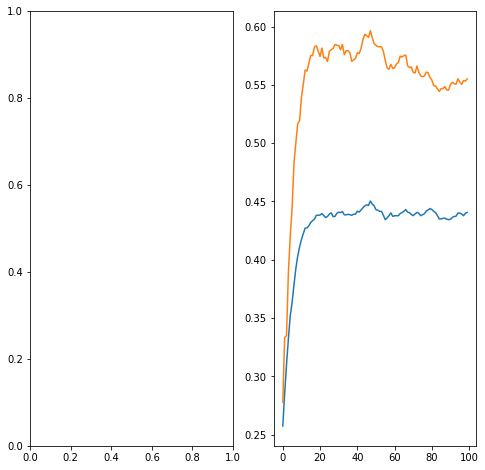

In [214]:
# Agent
import statistics

class Person(Agent):
    """ Base agent class """
    def __init__(self,unique_id,model,age,education,income,stance,attitude,pbc,subnorms,cluster,adopted=0):
        super().__init__(unique_id,model)
        self.age = age
        self.education = education
        self.income= income
        self.stance = stance 
        
        self.attitude=attitude
        self.pbc=pbc
        self.subnorms = subnorms
        
        self.cluster=cluster
        self.adopted=0
        
        
    def step(self):
        pass
    

#Model

class AdoptionModel(Model):
    step_time = 1 #1 step = 1 month
    
    def __init__(self):
        self.schedule = BaseScheduler(self)
        self.graph0=nx.Graph()
        self.graph1=nx.Graph()
        self.graph2=nx.Graph()
        self.graph3=nx.Graph()
        
        self.attitude_threshold = 0.8
        self.subnorms_threshold = 0.8
        self.pbc_threshold = 0.8
        self.list_of_adopters_at_timestep=[]
        self.attitude_medians_timesteps={}
        self.attitudes_timesteps={}
        ## Data-Collectors: 
        
        self.changes={}  # to track changes in attitude
        self.total_adopters={}
        
        id_dict= {}
        
        df = pd.read_csv('demographics_vars_clusters.csv')
        df.set_index('CASE_ID')

        for _,row in df.iterrows():
            agent=None
            
            agent = Person(row['CASE_ID'],self,age=row['AGE_BINNED'], education=row['EDUC_BINNED'],\
                          income=row['INCOME_BINNED'],stance=row['STANCE'],\
                          attitude=row['attitude'],pbc=row['pbc'],subnorms=row['subnorms'],cluster=row['cluster'])
            if agent:
                self.schedule.add(agent)
                id_dict[agent.unique_id]=agent

                #self.graph.add_node(agent.unique_id)

        #cluster0
        c0 = df.loc[df['cluster']==0]
        for i in list(c0['CASE_ID']):
            self.graph0.add_node(id_dict[i],label=i)
        for i in range(2):
            self.graph0.add_edge(random.choice(list(self.graph0.nodes)),random.choice(list(self.graph0.nodes)))

        #cluster1
        c1 = df.loc[df['cluster']==1]
        for i in list(c1['CASE_ID']):
            self.graph1.add_node(id_dict[i],label=i)
        for i in range(2):
            self.graph1.add_edge(random.choice(list(self.graph1.nodes)),random.choice(list(self.graph1.nodes)))

        #cluster2
        c2 = df.loc[df['cluster']==2]
        for i in list(c2['CASE_ID']):
            self.graph2.add_node(id_dict[i],label=i)
        for i in range(2):
            self.graph2.add_edge(random.choice(list(self.graph2.nodes)),random.choice(list(self.graph2.nodes)))

        #cluster3
        c3 = df.loc[df['cluster']==3]
        for i in list(c3['CASE_ID']):
            self.graph3.add_node(id_dict[i],label=i)
        for i in range(2):
            self.graph3.add_edge(random.choice(list(self.graph3.nodes)),random.choice(list(self.graph3.nodes)))

        self.graph0_1=nx.compose(self.graph0,self.graph1)
        self.graph2_3=nx.compose(self.graph2,self.graph3)
        self.graph= nx.compose(self.graph0_1,self.graph2_3) ## the graph with clusters is initialized

    def add_and_remove_edges(G, p_new_connection, p_remove_connection):    
        '''    
        for each node,    
          add a new connection to random other node, with prob p_new_connection,    
          remove a connection, with prob p_remove_connection    

        operates on G in-place    
        '''         
        
        new_edges = []    
        rem_edges = []   
        self.G = G
        self.p_new_connection=p_new_connection 
        self.p_remove_connection = p_remove_connection

        for node in self.G.nodes():    
            # find the other nodes this one is connected to    
            connected = [to for (fr, to) in self.G.edges(node)]    
            # and find the remainder of nodes, which are candidates for new edges   
            unconnected = [n for n in self.G.nodes() if not n in connected]    

            # probabilistically add a random edge    
            if len(unconnected): # only try if new edge is possible    
                if random.random() < self.p_new_connection:    
                    new = random.choice(unconnected)    
                    self.G.add_edge(node, new)    
                    #print("\tnew edge:\t {} -- {}".format(node, new)    
                    new_edges.append( (node, new) )    
                    # book-keeping, in case both add and remove done in same cycle  
                    unconnected.remove(new)    
                    connected.append(new)    

            # probabilistically remove a random edge    
            if len(connected): # only try if an edge exists to remove    
                if random.random() < self.p_remove_connection:    
                    remove = random.choice(connected)    
                    self.G.remove_edge(node, remove)    
                    #print "\tedge removed:\t {} -- {}".format(node, remove)    
                    rem_edges.append( (node, remove) )    
                    # book-keeping, in case lists are important later?    
                    connected.remove(remove)    
                    unconnected.append(remove)    
        return rem_edges, new_edges 
 
    
   ## Source:  http://jasss.soc.surrey.ac.uk/15/4/4.html
    def ra_implementation(self,a,b):
        uncertainty_map = {0:0.5,1:0.05,2:0.1,3:0.75,4:0.1,5:0.05,6:0.3}
        mu = 0.2 #intentity of interactions

        h_ij=0
        x_j=a.attitude
        u_j= uncertainty_map[a.stance]
        x_i=b.attitude
        u_i=uncertainty_map[b.stance]

        h_ij=min(x_i+u_i, x_j+u_j) - max(x_i-u_i, x_j-u_j)

        if(h_ij>u_i):
            #print('changed')
            relagree=(h_ij/u_i)-1
            delta_x_j=mu*relagree*(x_i-x_j)
            delta_u_j=mu*relagree*(u_i-u_j)
            x_j=x_j+delta_x_j
            x_i=u_j+delta_u_j
            # print "influence! dx, du=",delta_x_j,delta_u_j
            a.attitude=x_j
            b.attitude=x_i
            
        return a.attitude,b.attitude

                
    def interact(self):
        
        self.p_new_connection =0.25
        self.p_remove_connection = 0.15


        self.rem_edges,  self.new_edges = add_and_remove_edges(self.graph,  self.p_new_connection,  self.p_remove_connection)
        self.graph.remove_edges_from(self.rem_edges)
        self.graph.add_edges_from(self.new_edges)
            
        self.interactions = list(self.graph.edges)
        
        for i in range(len(self.interactions)):

            a=self.interactions[i][0]
            b=self.interactions[i][1]
            
            self.changes[a.unique_id,self.schedule.steps]= a.attitude
            self.changes[b.unique_id,self.schedule.steps]=b.attitude
            
            a.attitude,b.attitude= self.ra_implementation(a,b)
            self.changes[a.unique_id,self.schedule.steps]= a.attitude
            self.changes[b.unique_id,self.schedule.steps]= b.attitude 
            
            if ((a.attitude > self.attitude_threshold) & (a.subnorms > self.subnorms_threshold) & \
                                                        (a.pbc > self.pbc_threshold)):
                a.adopted = 1
            if ((b.attitude > self.attitude_threshold) & (b.subnorms > self.subnorms_threshold) & \
                                                        (b.pbc > self.pbc_threshold)):
                b.adopted = 1
        
        self.attitude_evolution=0
       
        temp=[]
        self.list_of_adopters_at_timestep=[]
        for agent in self.schedule.agents:
            if agent.adopted==1:
                self.list_of_adopters_at_timestep.append(agent.unique_id)
            self.attitude_evolution= self.attitude_evolution+agent.attitude
            temp.append(agent.attitude)
        self.attitude_evolution=self.attitude_evolution/len(self.schedule.agents)
        self.attitude_medians_timesteps[self.schedule.steps]=statistics.median(temp)
        self.attitudes_timesteps[self.schedule.steps]=self.attitude_evolution
        
        self.total_adopters[self.schedule.steps]=len(self.list_of_adopters_at_timestep)
        
        ## plotting how attitude evolves:
        
            
        
    def store(self):
        print(self.changes)
    
    def plot_adopters(self):
        if self.schedule.steps == 99:
            D=self.attitudes_timesteps
            D2= self.attitude_medians_timesteps
            fig,ax = plt.subplots(1,2,figsize=(8,8))
            #D= self.total_adopters
            ax=plt.plot(list(D.keys()), list(D.values()))
            ax=plt.plot(list(D2.keys()), list(D2.values()))
            plt.show()

            
            #print(self.total_adopters)
           
        
    def step(self):
        """ Advance the model by 1 step """
        if len(self.schedule.agents)>0:
            self.interact()
            #self.store()
            self.plot_adopters()
        self.schedule.step()
        
sample = AdoptionModel()
for i in range(100):
    #print('step',i)
    sample.step()
    


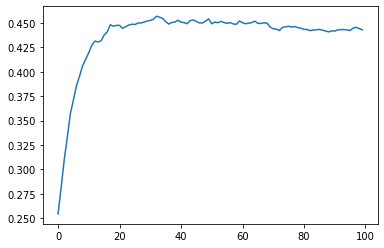

In [211]:
plt.plot(sample.attitudes_timesteps.keys(),sample.attitudes_timesteps.values())

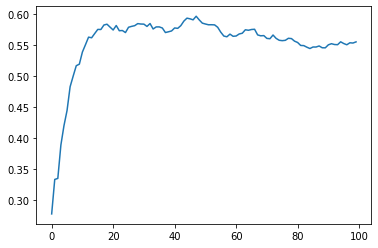

In [215]:
plt.plot(sample.attitude_medians_timesteps.keys(),sample.attitude_medians_timesteps.values())

In [70]:
df=pd.read_csv('demographics_vars_clusters.csv')
graph0=nx.Graph()
graph1= nx.Graph()
graph2= nx.Graph()
graph3= nx.Graph()


#cluster0
c0 = df.loc[df['cluster']==0]
for i in list(c0['CASE_ID']):
    graph0.add_node(i,label=i)
for i in range(2):
    graph0.add_edge(random.choice(list(graph0.nodes)),random.choice(list(graph0.nodes)))

#cluster1
c1 = df.loc[df['cluster']==1]
for i in list(c1['CASE_ID']):
    graph1.add_node(i,label=i)
for i in range(2):
    graph1.add_edge(random.choice(list(graph1.nodes)),random.choice(list(graph1.nodes)))

#cluster2
c2 = df.loc[df['cluster']==2]
for i in list(c2['CASE_ID']):
    graph2.add_node(i,label=i)
for i in range(2):
    graph2.add_edge(random.choice(list(graph2.nodes)),random.choice(list(graph2.nodes)))

#cluster3
c3 = df.loc[df['cluster']==3]
for i in list(c3['CASE_ID']):
    graph3.add_node(i,label=i)
for i in range(2):
    graph3.add_edge(random.choice(list(graph3.nodes)),random.choice(list(graph3.nodes)))

graph0_1=nx.compose(graph0,graph1)
graph2_3=nx.compose(graph2,graph3)
graph= nx.compose(graph0_1,graph2_3)


#pos=nx.spring_layout(graph)
#nx.draw_networkx(graph,pos=pos)



In [73]:
## adding lat lon position to each household
households['lon'] = households.geometry.x
households['lat'] = households.geometry.y
households.head()

,rand_point,case_id,bgid,household_,age,income,sample_inc,ami_catego,tract,elec_consu,TRACTCE10,BLOCKCE10,GEOID10,geometry,lon,lat
0,49600.0,49601,0136013,0.0,65plus,less75k,48211.894813,1,013601,110.040484,013601,3003,360010136013003,POINT (-73.76145 42.73081),-73.761455,42.730810
1,43072.0,43073,0146082,0.0,65plus,75to100k,80967.636950,4,014608,124.086360,014608,2000,360010146082000,POINT (-73.86377 42.68991),-73.863765,42.689911
2,63831.0,63832,0136022,0.0,25to44,less75k,68800.491254,2,013602,101.029416,013602,2016,360010136022016,POINT (-73.74489 42.68852),-73.744885,42.688518
3,78662.0,78663,0146144,0.0,65plus,150kplus,179780.837865,4,014614,124.086360,014614,4010,360010146144010,POINT (-73.89201 42.68515),-73.892010,42.685147
4,59457.0,59458,0135081,0.0,25to44,75to100k,87562.173039,4,013508,124.086360,013508,1000,360010135081000,POINT (-73.73878 42.81132),-73.738781,42.811324


In [ ]:
## unique censusblock id 


## Adding block-wise nodes

In [304]:

block_dict={}  #contains all the case_ids within each block as a dictionary. 
for cblock in list(set(list(households['GEOID10']))):
    df= households.loc[households['GEOID10']==cblock]
    temp=[]
    for i in list(df['case_id']):
        temp.append(i)
    block_dict[cblock]=temp #contains block number as key and list of caseids as value 
    
#now that i have a block and caseid dictionary, i can create a graph with nodes for each block
graph_dict={}
cases=[]
for k in list(block_dict.keys()):
    g = nx.Graph()
    
    for case in list(block_dict[k]):
        lon = households.loc[households['case_id']==case,'lon'].values[0]
        lat = households.loc[households['case_id']==case,'lat'].values[0]
        cases.append(case)
        g.add_node(str(case).zfill(9), label=str(case),pos=(lon,lat))
    graph_dict[k]=g
    
print(len(cases))        

3950


## Adding random edges between block-wise nodes and composing them to a main-graph

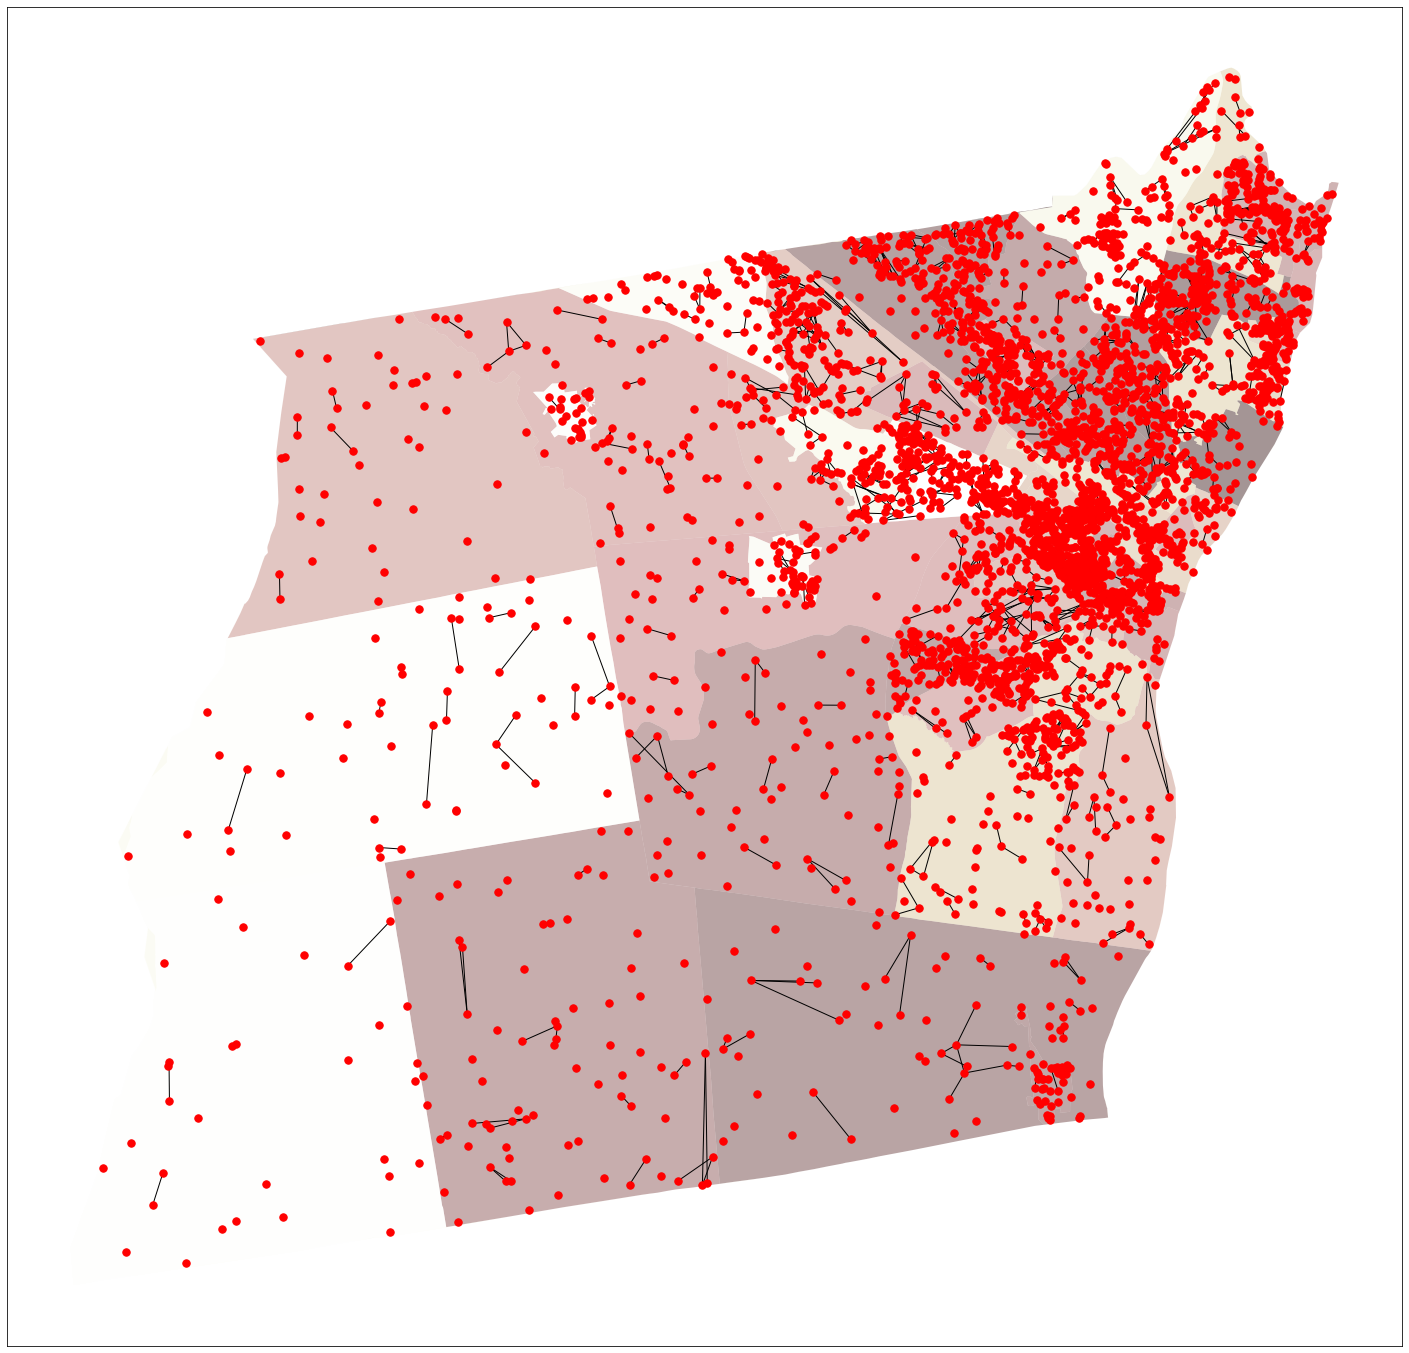

In [305]:

main_graph = nx.Graph()

def add_and_remove_edges(G, p_new_connection, p_remove_connection):    
    '''    
    for each node,    
      add a new connection to random other node, with prob p_new_connection,    
      remove a connection, with prob p_remove_connection    

    operates on G in-place    
    '''                
    new_edges = []    
    rem_edges = [] 
    for node in G.nodes():    
        # find the other nodes this one is connected to    
        connected = [to for (fr, to) in G.edges(node)]    
        # and find the remainder of nodes, which are candidates for new edges   
        unconnected = [n for n in G.nodes() if not n in connected]    

        # probabilistically add a random edge    
        if len(unconnected): # only try if new edge is possible    
            if random.random() < p_new_connection:    
                new = random.choice(unconnected)    
                G.add_edge(node, new)    
                #print("\tnew edge:\t {} -- {}".format(node, new)    
                new_edges.append( (node, new) )    
                # book-keeping, in case both add and remove done in same cycle  
                unconnected.remove(new)    
                connected.append(new)    

        # probabilistically remove a random edge    
        if len(connected): # only try if an edge exists to remove    
            if random.random() < p_remove_connection:    
                remove = random.choice(connected)    
                G.remove_edge(node, remove)    
                #print "\tedge removed:\t {} -- {}".format(node, remove)    
                rem_edges.append( (node, remove) )    
                # book-keeping, in case lists are important later?    
                connected.remove(remove)    
                unconnected.append(remove)    
    return rem_edges, new_edges 

p_new_connection =0.85
p_remove_connection = 0.85

for i in list(graph_dict.keys()):
    rem_edges, new_edges = add_and_remove_edges(graph_dict[i], p_new_connection, p_remove_connection)
    graph_dict[i].remove_edges_from(rem_edges)
    graph_dict[i].add_edges_from(new_edges)
    main_graph= nx.compose(main_graph,graph_dict[i])

    
#pos=nx.spring_layout(graph)
#nx.draw_networkx(main_graph)
fig,ax = plt.subplots(figsize=(25,25))
albany=albany.to_crs('EPSG:4326')
albany.plot(ax=ax,alpha=0.5,cmap='pink')

nx.draw_networkx(main_graph,nx.get_node_attributes(main_graph, 'pos'),ax=ax,node_size=55,with_labels=False,node_color='red')
    


In [ ]:
main_graph.nodes

In [153]:
albany = gpd.read_file('C:\\Users\\Gamelab\\Desktop\\RT\\Others\\Thesis\\Thesis_coding\\survey\\analysis\\data\\albany_shapefiles\\albany_censustracts.shp')

## Plotting the graphs

In [ ]:
fig,ax = plt.subplots(figsize=(10,10))
albany=albany.to_crs('EPSG:4326')
albany.plot(ax=ax,alpha=0.5,cmap='pink')

nx.draw_networkx(main_graph,nx.get_node_attributes(main_graph, 'pos'),ax=ax,node_size=55,with_labels=False,node_color='red')

#nx.draw_networkx(graph_dict['1051'],nx.get_node_attributes(graph_dict['1051'], 'pos'),ax=ax,node_size=55,with_labels=False,node_color='red')
#nx.draw_networkx(graph_dict['4006'],nx.get_node_attributes(graph_dict['4006'], 'pos'),ax=ax,node_size=55,with_labels=False,node_color='pink')

## Calculating Gower's Distance

In [165]:
import gower
## add the required household row as last row in the demographics survey data
demographics = demographics.rename(columns={'AGE_BINNED':'age','INCOME_BINNED':'income','PEOPLE_TOT_3PLUS':'household_'})
demographics.head(2)

,age,income,household_
CASE_ID,,,
1,65plus,75to100k,0.0
2,55to64,100to150k,0.0


### making the case ids of the households data with 9 digit padding so that they are not confused with the indexes in survey data

In [212]:
household_demo= households[['case_id','age','income','household_']]
new_caseids=[]
for i in list(household_demo['case_id']):
    new_caseids.append(str(i).zfill(9))

household_demo['case_id']= new_caseids
household_demo['household_']=household_demo['household_'].astype('object')
household_demo= household_demo.rename(columns={'case_id':'CASE_ID'})
household_demo = household_demo.set_index('CASE_ID')
household_demo.info(2)

<class 'pandas.core.frame.DataFrame'>
Index: 3950 entries, 000049601 to 000002425
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   age         3950 non-null   object
 1   income      3950 non-null   object
 2   household_  3950 non-null   object
dtypes: object(3)
memory usage: 123.4+ KB


<ipython-input-212-583a0f10eee2>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  household_demo['case_id']= new_caseids
<ipython-input-212-583a0f10eee2>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  household_demo['household_']=household_demo['household_'].astype('object')


In [253]:
household_demo.index[:10]

Index(['000049601', '000043073', '000063832', '000078663', '000059458',
       '000075571', '000060473', '000040631', '000028861', '000013324'],
      dtype='object', name='CASE_ID')

In [269]:
#take the first row of households
attitude={}
subnorms={}
pbc={}
errorids = []
for household_case in list(household_demo.index):
    new_record = household_demo.loc[household_case]

    #add to last row of demographics data
    demo = demographics
    demo['household_'] = demo['household_'].astype('object')
    demo = demo.append(new_record)

    #calculate gower's distance
    new_row = gower.gower_matrix(demo)[-1]
    #new_row

    indexes = list(demo.index)

    temp = min(new_row)
    res = [i for i, j in enumerate(new_row) if j == temp]
    #res

    caseids = []
    for i in res:
        caseids.append(indexes[i])


    c = []
    for i in caseids:
        c.append(int(i))

    atts = []
    sn = []
    p = []
    try:
        for i in c:
            if i!=c[-1]:
                atts.append(tpb_attributes.loc[i]['attitude'])
                sn.append(tpb_attributes.loc[i]['subnorms'])
                p.append(tpb_attributes.loc[i]['pbc'])
        
        attitude[household_case]= np.random.choice(atts)
        subnorms[household_case]=np.random.choice(sn)
        pbc[household_case]=np.random.choice(p)
    except:
        attitude[household_case]= 0
        subnorms[household_case]=0
        pbc[household_case]=0
        print(household_case)
        errorids.append(household_case)
        continue
        
#tpb_households= household_demo
#tpb_households['attitude']=attitude
#tpb_households['subnorms']=subnorms
#tpb_households['pbc']=pbc

000035402
000073606
000073645
000073637
000072293
000061329
000075775
000075777
000041574
000075414
000027233
000002601
000035405
000041172
000060813
000075819
000072106
000041065


In [276]:
household_demo['attitude']= list(attitude.values())
household_demo['subnorms']= list(subnorms.values())
household_demo['pbc']= list(pbc.values())

household_demo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3950 entries, 000049601 to 000002425
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         3950 non-null   object 
 1   income      3950 non-null   object 
 2   household_  3950 non-null   object 
 3   attitude    3950 non-null   float64
 4   subnorms    3950 non-null   float64
 5   pbc         3950 non-null   float64
dtypes: float64(3), object(3)
memory usage: 345.1+ KB


In [277]:
household_demo.to_csv('subset_initialized2.csv')

In [278]:
household_demo.head()

,age,income,household_,attitude,subnorms,pbc
CASE_ID,,,,,,
000049601,65plus,less75k,0.0,0.2500,-0.50,-0.166667
000043073,65plus,75to100k,0.0,0.0625,0.00,-0.333333
000063832,25to44,less75k,0.0,0.8125,0.25,-0.333333
000078663,65plus,150kplus,0.0,0.6875,0.00,0.000000
000059458,25to44,75to100k,0.0,0.5000,0.50,-0.166667


In [281]:
household_demo['CASE_ID'] = household_demo.index
household_demo

,age,income,household_,attitude,subnorms,pbc,CASE_ID
CASE_ID,,,,,,,
000049601,65plus,less75k,0.0,0.2500,-0.50,-0.166667,000049601
000043073,65plus,75to100k,0.0,0.0625,0.00,-0.333333,000043073
000063832,25to44,less75k,0.0,0.8125,0.25,-0.333333,000063832
000078663,65plus,150kplus,0.0,0.6875,0.00,0.000000,000078663
000059458,25to44,75to100k,0.0,0.5000,0.50,-0.166667,000059458
...,...,...,...,...,...,...,...
000003621,65plus,75to100k,1.0,0.8750,0.50,-0.666667,000003621
000071790,65plus,less75k,1.0,0.3125,0.00,-0.833333,000071790
000041937,45to54,less75k,0.0,0.1250,0.50,0.000000,000041937


## ABM trial with subset of households

In [317]:
# Agent
import statistics

class Person(Agent):
    """ Base agent class """
    def __init__(self,unique_id,model,age,income,size,attitude,subnorms,pbc,adopted=0):
        super().__init__(unique_id,model)
        self.age = age
        self.income= income
        self.size = size
        self.attitude=attitude
        self.pbc=pbc
        self.subnorms = subnorms
        
        self.adopted=0
        
        
    def step(self):
        pass
    

#Model

class AdoptionModel(Model):
    step_time = 1 #1 step = 1 month
    
    def __init__(self):
        self.schedule = BaseScheduler(self)
        self.graph = main_graph
        self.attitude_threshold = 0.8
        self.subnorms_threshold = 0.8
        self.pbc_threshold = 0.8
        self.list_of_adopters_at_timestep=[]
        self.attitude_medians_timesteps={}
        self.attitudes_timesteps={}
        ## Data-Collectors: 
        
        self.changes={}  # to track changes in attitude
        self.total_adopters={}
        
        id_dict= {}
        
        #df = pd.read_csv('household_demo.csv')
        df = household_demo
        #df['CASE_ID'] = list(df.index())

        for _,row in df.iterrows():
            agent=None
            
            agent = Person(self,str(row['CASE_ID']),age=row['age'],\
                          income=row['income'],size=row['household_'],\
                          attitude=row['attitude'],pbc=row['pbc'],subnorms=row['subnorms'])
            if agent:
                self.schedule.add(agent)
                id_dict[agent.unique_id]=agent

                #self.graph.add_node(agent.unique_id)



    def add_and_remove_edges(G, p_new_connection, p_remove_connection):    
        '''    
        for each node,    
          add a new connection to random other node, with prob p_new_connection,    
          remove a connection, with prob p_remove_connection    

        operates on G in-place    
        '''         
        
        new_edges = []    
        rem_edges = []   
        self.G = G
        self.p_new_connection=p_new_connection 
        self.p_remove_connection = p_remove_connection

        for node in self.G.nodes():    
            # find the other nodes this one is connected to    
            connected = [to for (fr, to) in self.G.edges(node)]    
            # and find the remainder of nodes, which are candidates for new edges   
            unconnected = [n for n in self.G.nodes() if not n in connected]    

            # probabilistically add a random edge    
            if len(unconnected): # only try if new edge is possible    
                if random.random() < self.p_new_connection:    
                    new = random.choice(unconnected)    
                    self.G.add_edge(node, new)    
                    #print("\tnew edge:\t {} -- {}".format(node, new)    
                    new_edges.append( (node, new) )    
                    # book-keeping, in case both add and remove done in same cycle  
                    unconnected.remove(new)    
                    connected.append(new)    

            # probabilistically remove a random edge    
            if len(connected): # only try if an edge exists to remove    
                if random.random() < self.p_remove_connection:    
                    remove = random.choice(connected)    
                    self.G.remove_edge(node, remove)    
                    #print "\tedge removed:\t {} -- {}".format(node, remove)    
                    rem_edges.append( (node, remove) )    
                    # book-keeping, in case lists are important later?    
                    connected.remove(remove)    
                    unconnected.append(remove)    
        return rem_edges, new_edges 
 
    
   ## Source:  http://jasss.soc.surrey.ac.uk/15/4/4.html
    def ra_implementation(self,a,b):
        uncertainty_map = {0:0.5,1:0.05,2:0.1,3:0.75,4:0.1,5:0.05,6:0.3}
        mu = 0.2 #intentity of interactions

        h_ij=0
        x_j=a.attitude
        u_j= uncertainty_map[a.stance]
        x_i=b.attitude
        u_i=uncertainty_map[b.stance]

        h_ij=min(x_i+u_i, x_j+u_j) - max(x_i-u_i, x_j-u_j)

        if(h_ij>u_i):
            #print('changed')
            relagree=(h_ij/u_i)-1
            delta_x_j=mu*relagree*(x_i-x_j)
            delta_u_j=mu*relagree*(u_i-u_j)
            x_j=x_j+delta_x_j
            x_i=u_j+delta_u_j
            # print "influence! dx, du=",delta_x_j,delta_u_j
            a.attitude=x_j
            b.attitude=x_i
            
        return a.attitude,b.attitude

                
    def interact(self):
        
        self.p_new_connection =0.55
        self.p_remove_connection = 0.55


        self.rem_edges,  self.new_edges = add_and_remove_edges(self.graph,  self.p_new_connection,  self.p_remove_connection)
        self.graph.remove_edges_from(self.rem_edges)
        self.graph.add_edges_from(self.new_edges)
            
        self.interactions = list(self.graph.edges)
        
        for i in range(len(self.interactions)):

            a=self.interactions[i][0]
            b=self.interactions[i][1]
            
            self.changes[a.unique_id,self.schedule.steps]= a.attitude
            self.changes[b.unique_id,self.schedule.steps]=b.attitude
            
            a.attitude,b.attitude= self.ra_implementation(a,b)
            self.changes[a.unique_id,self.schedule.steps]= a.attitude
            self.changes[b.unique_id,self.schedule.steps]= b.attitude 
            
            if ((a.attitude > self.attitude_threshold) & (a.subnorms > self.subnorms_threshold) & \
                                                        (a.pbc > self.pbc_threshold)):
                a.adopted = 1
            if ((b.attitude > self.attitude_threshold) & (b.subnorms > self.subnorms_threshold) & \
                                                        (b.pbc > self.pbc_threshold)):
                b.adopted = 1
        
        self.attitude_evolution=0
       
        temp=[]
        self.list_of_adopters_at_timestep=[]
        for agent in self.schedule.agents:
            if agent.adopted==1:
                self.list_of_adopters_at_timestep.append(agent.unique_id)
            self.attitude_evolution= self.attitude_evolution+agent.attitude
            temp.append(agent.attitude)
        self.attitude_evolution=self.attitude_evolution/len(self.schedule.agents)
        self.attitude_medians_timesteps[self.schedule.steps]=statistics.median(temp)
        self.attitudes_timesteps[self.schedule.steps]=self.attitude_evolution
        
        self.total_adopters[self.schedule.steps]=len(self.list_of_adopters_at_timestep)
        
        ## plotting how attitude evolves:
        
            
        
    def store(self):
        print(self.changes)
    
    def plot_adopters(self):
        if self.schedule.steps ==3:
            D=self.attitudes_timesteps
            D2= self.attitude_medians_timesteps
            fig,ax = plt.subplots(1,2,figsize=(8,8))
            #D= self.total_adopters
            ax=plt.plot(list(D.keys()), list(D.values()))
            ax=plt.plot(list(D2.keys()), list(D2.values()))
            plt.show()

            
            #print(self.total_adopters)
           
        
    def step(self):
        """ Advance the model by 1 step """
        if len(self.schedule.agents)>0:
            self.interact()
            #self.store()
            self.plot_adopters()
        self.schedule.step()
        
sample = AdoptionModel()
for i in range(4):
    #print('step',i)
    sample.step()
    


In [319]:
sample.schedule.agents[0].unique_id

IndexError: list index out of range